<a href="https://colab.research.google.com/github/anggaangoro3/data-science-project/blob/main/Copy_Tugas_Modul_8_Kelompok_VIP_28_Data_Sains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUGAS A/1\
Nama Anggota Kelompok:
1. Dana Eky Novya
2. Mochamad Raihan Yafi Himawan
3. Muhammad Rizky Ferdiansyah
4. Nafhah Nurul Hasanah
5. Azmi Reza Anggoro


# Download Dataset via KaggleHub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/autompg-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'autompg-dataset' dataset.
Path to dataset files: /kaggle/input/autompg-dataset


In [ ]:
"""Kode ini digunakan untuk memindahkan file dataset yang telah ter download
kedalam direktori '/content/dataset' google colab"""
import shutil

# Source folder dari kagglehub
src_path = path

# Target folder (direktori kerja biasa)
dst_path = "/content/dataset"

# Salin semua isi folder
shutil.copytree(src_path, dst_path, dirs_exist_ok=True)

print("Dataset telah dipindahkan ke:", dst_path)

Dataset telah dipindahkan ke: /content/dataset


# Import Library

In [ ]:
# Library yang sudah pernah dipelajari
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Untuk Machine Learning (Scikit-learn)
from sklearn.model_selection import train_test_split # Untuk membagi data train dan test
from sklearn.linear_model import LinearRegression # Menggunakan Linear Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score # Metrik evaluasi untuk model regresi

# Profiling Dataset

In [ ]:
# Load Dataset
df = pd.read_csv('dataset/auto-mpg.csv')
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None
              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000   

# Pre-processing Data

In [ ]:
# Diagnosis - Cek Duplikat
duplicate_rows = df.duplicated().sum()
print(f"Ditemukan {duplicate_rows} baris data duplikat.")

Ditemukan 0 baris data duplikat.


In [ ]:
#Diagnosis - Cek Missing Values
print("\nJumlah Missing Values per Kolom:")
missing_values = df.isna().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("\nTidak ada missing values dalam data.")


Jumlah Missing Values per Kolom:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Tidak ada missing values dalam data.


In [ ]:
# Mengecek berapa banyak nilai '?' pada kolom horsepower
(df['horsepower'] == '?').sum()

np.int64(6)

In [ ]:
# Mengatasi Missing Value
# Ubah horsepower ke numerik dan tangani missing value
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna(subset=['horsepower']).reset_index(drop=True)

In [ ]:
# Cek tipe data setiap kolom
print("📘 Tipe data setiap kolom:")
print(df.dtypes)
print("\n")

# Cek jumlah missing value di setiap kolom
print("📊 Jumlah missing value per kolom:")
print(df.isnull().sum())


📘 Tipe data setiap kolom:
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


📊 Jumlah missing value per kolom:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [ ]:
# Encoding kolom 'origin'
from sklearn.preprocessing import LabelEncoder

# Buat objek encoder
encoder = LabelEncoder()
df['origin'] = encoder.fit_transform(df['origin'])

print(df['origin'].unique())

[0 2 1]


In [ ]:
# Diagnosis - Cek Outliers (pakai metode IQR)
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower',
                'weight', 'acceleration', 'model year']

# Hitung Q1, Q3, dan IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Buat filter untuk mendeteksi outlier
filter_iqr = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
              (df[numeric_cols] > (Q3 + 1.5 * IQR)))

# Hitung jumlah baris yang memiliki setidaknya satu outlier
outlier_rows = filter_iqr.any(axis=1).sum()

# Hitung persentasenya
outlier_percent = (outlier_rows / len(df)) * 100

# Cetak hasil
print(f"Jumlah total data: {len(df)}")
print(f"Jumlah baris yang mengandung outlier: {outlier_rows}")
print(f"Persentase outlier: {outlier_percent:.2f}%")


Jumlah total data: 392
Jumlah baris yang mengandung outlier: 20
Persentase outlier: 5.10%


In [ ]:
# Mengatasi Outliers (buat dua versi data)

# 1.Buat salinan data asli (tanpa penanganan outlier)
df_no_outlier_handling = df.copy()

#  Buat data baru setelah menghapus outlier
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower',
                'weight', 'acceleration', 'model year']

# Hitung Q1, Q3, dan IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Tentukan filter (True = data normal, False = outlier)
filter_iqr = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
               (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# 2.Buat dataframe baru tanpa outlier
df_outlier_removed = df[filter_iqr].reset_index(drop=True)

# Tampilkan ringkasan hasil
print("Jumlah data awal:", len(df))
print("Jumlah data tanpa penanganan outlier:", len(df_no_outlier_handling))
print("Jumlah data setelah hapus outlier:", len(df_outlier_removed))
print(f"Jumlah data yang dihapus karena outlier: {len(df) - len(df_outlier_removed)}")
print(f"Persentase data yang dihapus: {((len(df) - len(df_outlier_removed)) / len(df)) * 100:.2f}%")

Jumlah data awal: 392
Jumlah data tanpa penanganan outlier: 392
Jumlah data setelah hapus outlier: 372
Jumlah data yang dihapus karena outlier: 20
Persentase data yang dihapus: 5.10%


Splitting (membagi data)

In [ ]:
from sklearn.model_selection import train_test_split
# Pisahkan fitur & target untuk masing-masing data
X_no = df_no_outlier_handling.drop(['mpg','car name'], axis=1)
y_no = df_no_outlier_handling['mpg']

X_yes = df_outlier_removed.drop(['mpg','car name'], axis=1)
y_yes = df_outlier_removed['mpg']

# Split data train & test
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no, y_no, test_size=0.2, random_state=42)
X_train_yes, X_test_yes, y_train_yes, y_test_yes = train_test_split(X_yes, y_yes, test_size=0.2, random_state=42)

In [ ]:
# Cek ukuran data train & test untuk masing-masing dataset
print("=== Dataset tanpa hapus outlier ===")
print("Ukuran X_train_no:", X_train_no.shape)
print("Ukuran X_test_no :", X_test_no.shape)
print("Beberapa data train (tanpa hapus outlier):")
print(X_train_no.head())

print("\n=== Dataset setelah hapus outlier ===")
print("Ukuran X_train_yes:", X_train_yes.shape)
print("Ukuran X_test_yes :", X_test_yes.shape)
print("Beberapa data train (setelah hapus outlier):")
print(X_train_yes.head())


=== Dataset tanpa hapus outlier ===
Ukuran X_train_no: (313, 7)
Ukuran X_test_no : (79, 7)
Beberapa data train (tanpa hapus outlier):
     cylinders  displacement  horsepower  weight  acceleration  model year  \
258          6         225.0       110.0    3620          18.7          78   
182          4         140.0        92.0    2572          14.9          76   
172          6         171.0        97.0    2984          14.5          75   
63           8         318.0       150.0    4135          13.5          72   
340          4          86.0        64.0    1875          16.4          81   

     origin  
258       0  
182       0  
172       0  
63        0  
340       0  

=== Dataset setelah hapus outlier ===
Ukuran X_train_yes: (297, 7)
Ukuran X_test_yes : (75, 7)
Beberapa data train (setelah hapus outlier):
     cylinders  displacement  horsepower  weight  acceleration  model year  \
192          6         156.0       108.0    2930          15.5          76   
75           8  

# Eksplorasi Data

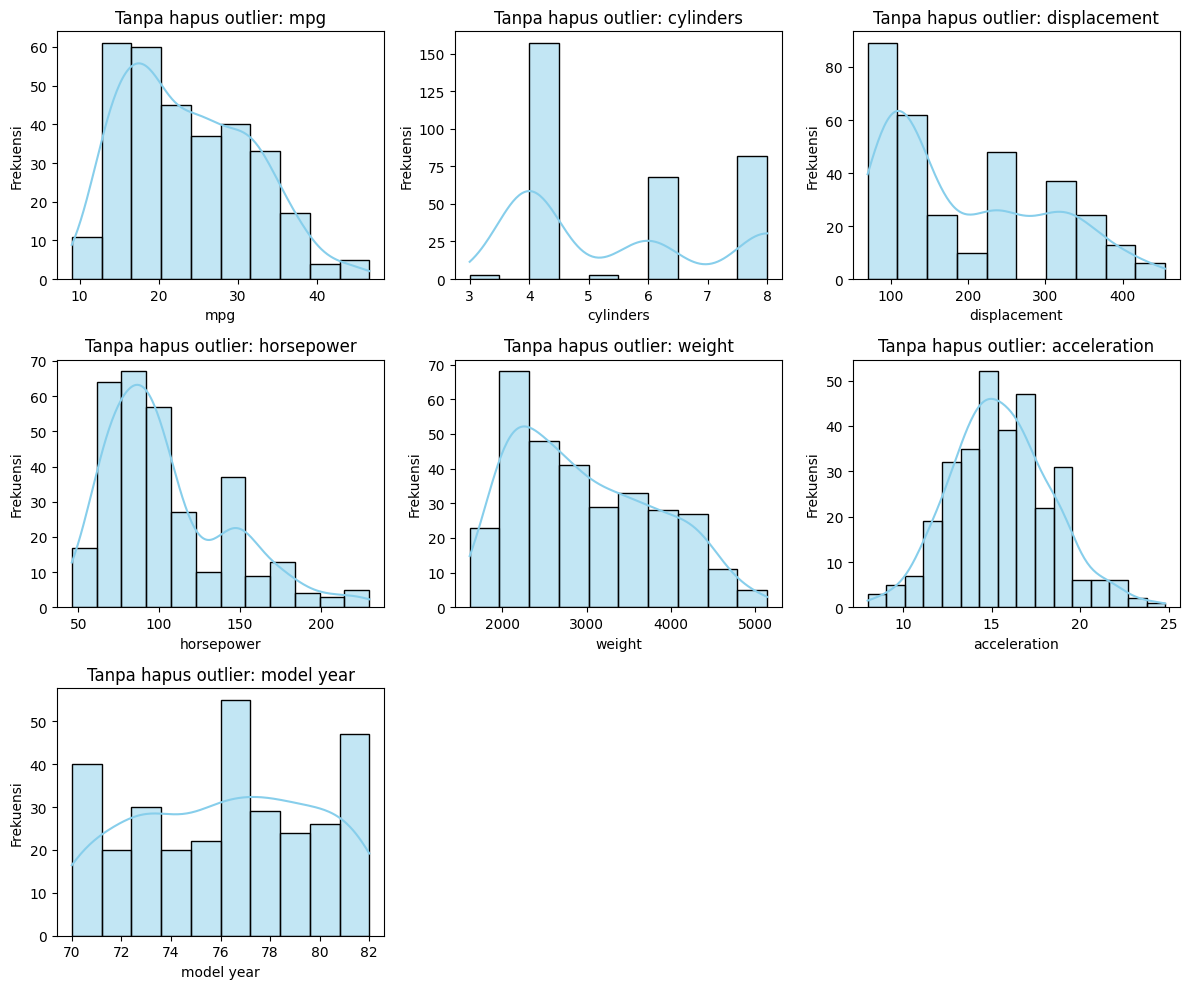

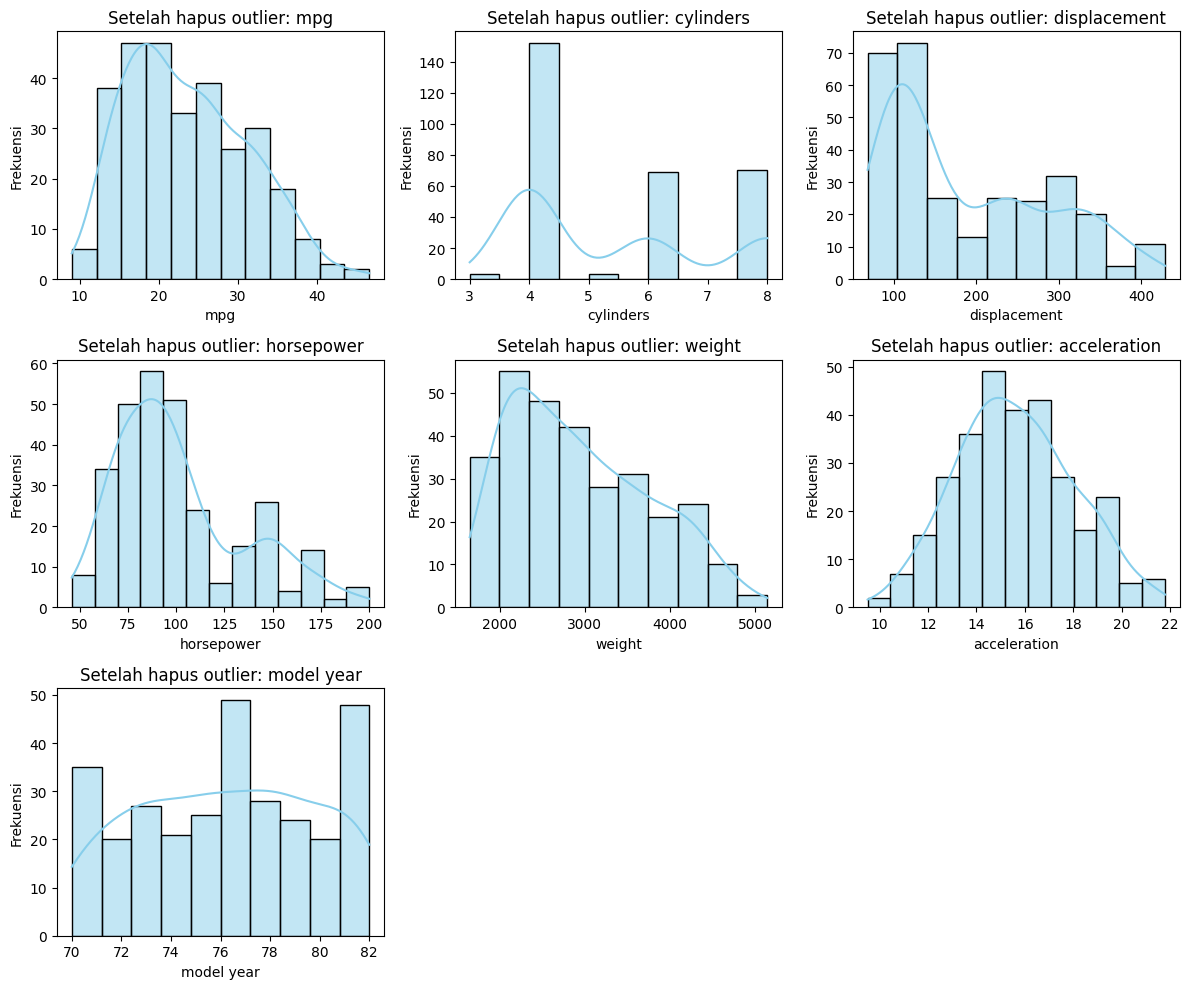

=== Dataset tanpa hapus outlier ===
Ukuran X_train: (313, 7)
Ukuran X_test : (79, 7)
Beberapa data train:
     cylinders  displacement  horsepower  weight  acceleration  model year  \
258          6         225.0       110.0    3620          18.7          78   
182          4         140.0        92.0    2572          14.9          76   
172          6         171.0        97.0    2984          14.5          75   
63           8         318.0       150.0    4135          13.5          72   
340          4          86.0        64.0    1875          16.4          81   

     origin  
258       0  
182       0  
172       0  
63        0  
340       0   

=== Dataset setelah hapus outlier ===
Ukuran X_train: (297, 7)
Ukuran X_test : (75, 7)
Beberapa data train:
     cylinders  displacement  horsepower  weight  acceleration  model year  \
192          6         156.0       108.0    2930          15.5          76   
75           8         304.0       150.0    3672          11.5          73 

In [ ]:
# --- Daftar kolom numerik untuk dicek distribusinya ---
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

# --- Fungsi plot distribusi ---
def plot_distribution(df, title):
    plt.figure(figsize=(12, 10))
    for i, col in enumerate(numeric_cols, 1):
        if col in df.columns:
            plt.subplot(3, 3, i)  # <-- panggil subplot dulu!
            sns.histplot(df[col], kde=True, color='skyblue')
            plt.title(f'{title}: {col}')
            plt.xlabel(col)
            plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

# --- Gabungkan data train agar kolom 'mpg' ikut terplot ---
train_no = pd.concat([X_train_no, y_train_no], axis=1)
train_yes = pd.concat([X_train_yes, y_train_yes], axis=1)

# --- Plot distribusi ---
plot_distribution(train_no, "Tanpa hapus outlier")
plot_distribution(train_yes, "Setelah hapus outlier")

# --- Fungsi cek ukuran dataset ---
def check_dataset_size(X_train, X_test, label):
    print(f"=== Dataset {label} ===")
    print("Ukuran X_train:", X_train.shape)
    print("Ukuran X_test :", X_test.shape)
    print("Beberapa data train:")
    print(X_train.head(), "\n")

# --- Cek ukuran train & test ---
check_dataset_size(X_train_no, X_test_no, "tanpa hapus outlier")
check_dataset_size(X_train_yes, X_test_yes, "setelah hapus outlier")

In [ ]:
# Ambil statistik ringkas
def compare_distributions(df_before, df_after, cols):
    stats_before = df_before[cols].describe().T[['mean', '50%', 'min', 'max', 'std']]
    stats_after = df_after[cols].describe().T[['mean', '50%', 'min', 'max', 'std']]

    stats_before.rename(columns={'50%': 'median'}, inplace=True)
    stats_after.rename(columns={'50%': 'median'}, inplace=True)

    comparison = stats_before.copy()
    comparison.columns = [f'{c}_before' for c in comparison.columns]

    for col in stats_after.columns:
        comparison[f'{col}_after'] = stats_after[col]

    return comparison

# Gunakan dataset train (gabungkan X dan y)
df_train_no = pd.concat([X_train_no, y_train_no], axis=1)
df_train_yes = pd.concat([X_train_yes, y_train_yes], axis=1)

# Kolom numerik
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

# Tampilkan tabel perbandingan
compare_table = compare_distributions(df_train_no, df_train_yes, numeric_cols)
print(compare_table)

              mean_before  median_before  min_before  max_before  std_before  \
mpg             23.599361           23.0         9.0        46.6    7.956255   
cylinders        5.482428            4.0         3.0         8.0    1.700446   
displacement   195.517572          151.0        70.0       455.0  103.766567   
horsepower     104.594249           95.0        46.0       230.0   38.283669   
weight        2986.124601         2855.0      1613.0      5140.0  841.133957   
acceleration    15.544089           15.5         8.0        24.8    2.817864   
model year      76.207668           76.0        70.0        82.0    3.630136   

               mean_after  median_after  min_after  max_after   std_after  
mpg             23.550168          22.4        9.0       46.6    7.542197  
cylinders        5.407407           4.0        3.0        8.0    1.658011  
displacement   189.136364         151.0       68.0      429.0   97.819655  
horsepower     101.424242          92.0       46.0     

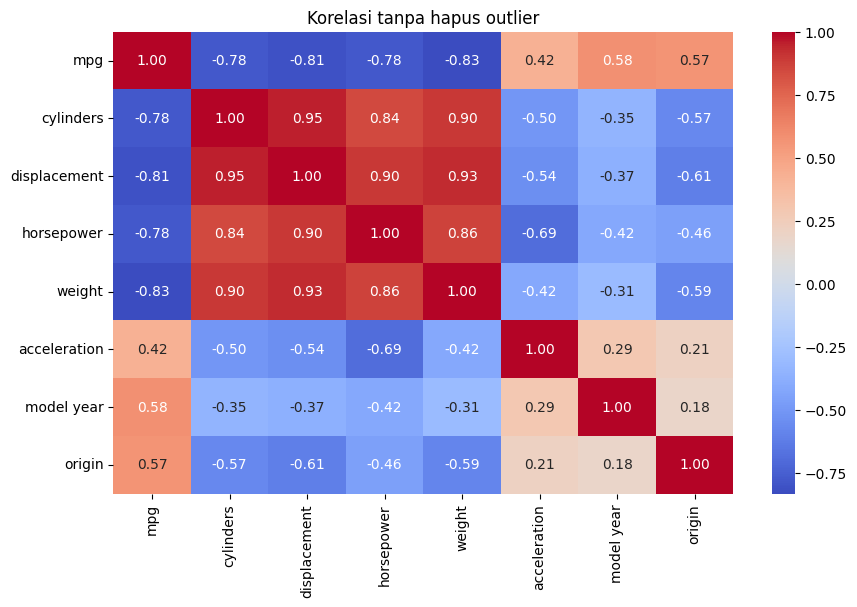

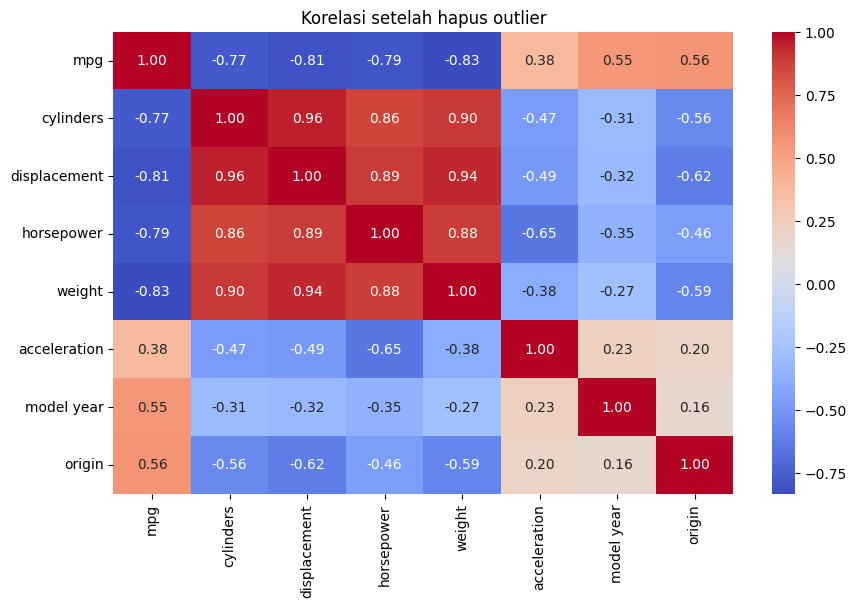

In [ ]:
# --- Ambil kolom numerik saja ---
numeric_no = df_no_outlier_handling.select_dtypes(include='number')
numeric_yes = df_outlier_removed.select_dtypes(include='number')

# --- Hitung korelasi ---
corr_no = numeric_no.corr()
corr_yes = numeric_yes.corr()

# --- Heatmap tanpa hapus outlier ---
plt.figure(figsize=(10,6))
sns.heatmap(corr_no, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi tanpa hapus outlier')
plt.show()

# --- Heatmap setelah hapus outlier ---
plt.figure(figsize=(10,6))
sns.heatmap(corr_yes, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi setelah hapus outlier')
plt.show()

# **Modeling**

In [ ]:
#Inisialisasi model
# Model 1: Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)

# Model 2: Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

#Training model

# Melatih Decision Tree
start_time_dt = time.time()
dt_regressor.fit(X_train_yes, y_train_yes)
end_time_dt = time.time()
print(f"Model Decision Tree Regressor. Waktu: {end_time_dt - start_time_dt:.2f} detik.")

# Melatih Random Forest
start_time_rf = time.time()
rf_regressor.fit(X_train_yes, y_train_yes)
end_time_rf = time.time()
print(f"Model Random Forest Regressor. Waktu: {end_time_rf - start_time_rf:.2f} detik.")

Model Decision Tree Regressor. Waktu: 0.01 detik.
Model Random Forest Regressor. Waktu: 0.21 detik.


# **EVALUASI MODEL**